In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:

# Load the data
df = pd.read_csv("../Netflix Analysis/netflix_titles.csv")

# Show basic structure
df.head(10)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [10]:
# Basic info
df.info()

# Check for missing values
df.isnull().sum()

# Drop rows with too many missing values (optional)
df.dropna(subset=['director', 'cast', 'country'], inplace=True)

# Check unique content types
df['type'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


type
Movie      5189
TV Show     147
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9584\4118788606.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


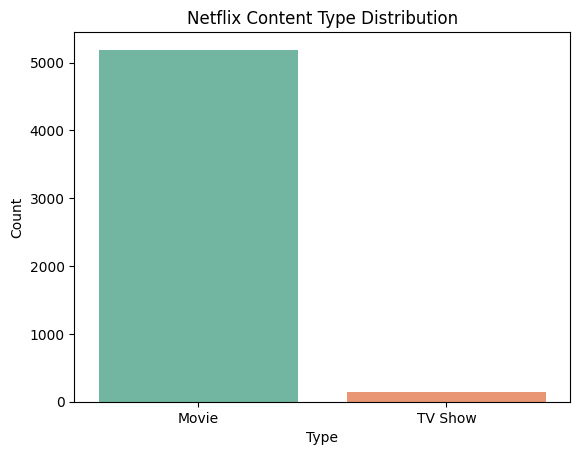

In [11]:
sns.countplot(data=df, x='type', palette='Set2')
plt.title("Netflix Content Type Distribution")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


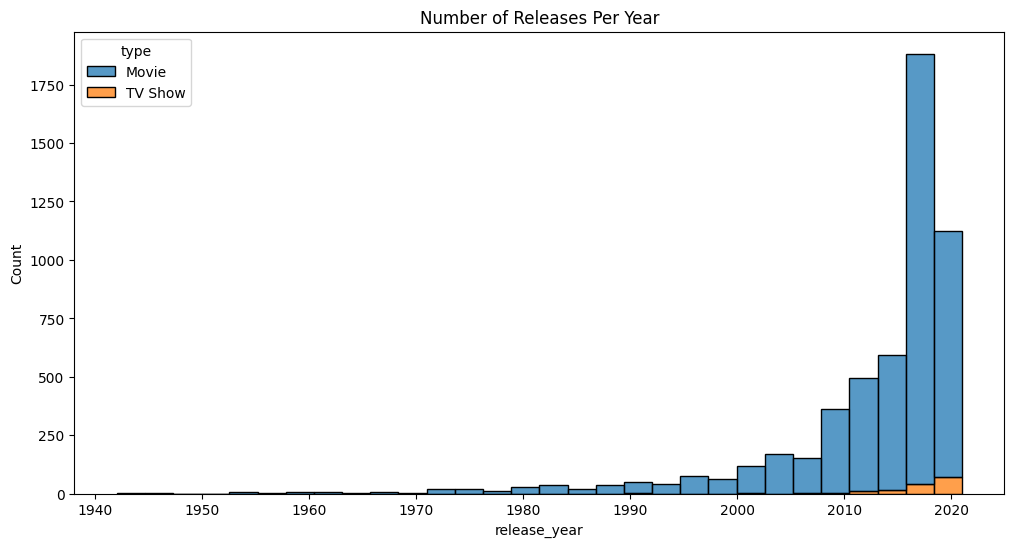

In [12]:
# Remove rows with null 'release_year'
df = df.dropna(subset=['release_year'])

# Plot
df['release_year'] = df['release_year'].astype(int)
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='release_year', bins=30, hue='type', multiple='stack')
plt.title("Number of Releases Per Year")
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9584\2724556600.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette='mako')


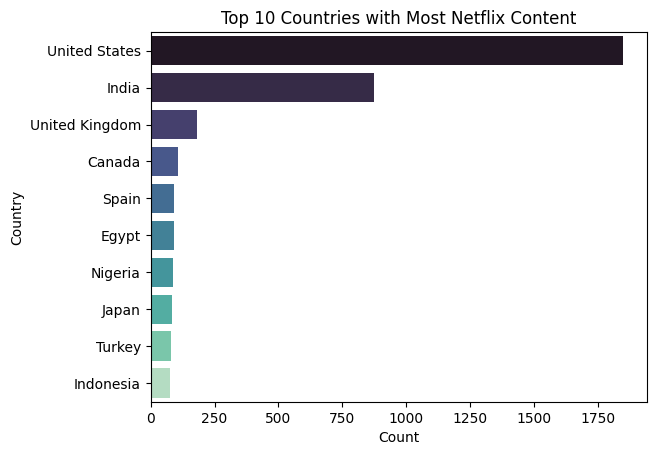

In [14]:
top_countries = df['country'].value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values, palette='mako')
plt.title("Top 10 Countries with Most Netflix Content")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9584\812418156.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_genres.index, x=top_genres.values, palette='viridis')


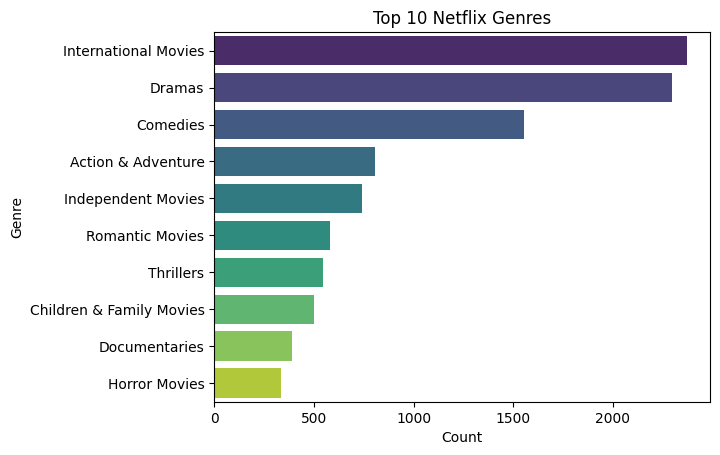

In [15]:
# Split and explode genres
df['genres'] = df['listed_in'].str.split(', ')
genres_exploded = df.explode('genres')

# Count top 10
top_genres = genres_exploded['genres'].value_counts().head(10)
sns.barplot(y=top_genres.index, x=top_genres.values, palette='viridis')
plt.title("Top 10 Netflix Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


In [16]:
# Filter only TV Shows from India after 2015
df_filtered = df[(df['type'] == 'TV Show') & (df['country'] == 'India') & (df['release_year'] > 2015)]
df_filtered[['title', 'release_year', 'listed_in']].head()


,title,release_year,listed_in
297,Navarasa,2021,TV Shows
1293,Pitta Kathalu,2021,"International TV Shows, TV Dramas"
1520,Paava Kadhaigal,2020,"International TV Shows, TV Dramas"
3036,Jamtara - Sabka Number Ayega,2020,"Crime TV Shows, International TV Shows, TV Dramas"
4685,GHOUL,2018,"International TV Shows, TV Dramas, TV Horror"
